# Deep Learning with TensorFlow/Keras

## ANN using TensorFlow

In [1]:
pip install Theano

     ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.8 MB 217.9 kB/s eta 0:00:13
     ---------------------------------------- 0.0/2.8 MB 187.9 kB/s eta 0:00:15
      --------------------------------------- 0.0/2.8 MB 219.4 kB/s eta 0:00:13
      --------------------------------------- 0.1/2.8 MB 252.2 kB/s eta 0:00:12
     - -------------------------------------- 0.1/2.8 MB 281.8 kB/s eta 0:00:10
     - -------------------------------------- 0.1/2.8 MB 309.1 kB/s eta 0:00:09
     - -------------------------------------- 0.1/2.8 MB 310.3 kB/s eta 0:00:09
     - -------------------------------------- 0.1/2.8 MB 328.4 kB/s eta 0:00:09
     - -------------------------------------- 0.1/2.8 MB 328.4 kB/s eta 0:00:09
     - -------------------------------------- 0.1/2.8 MB 328.4 kB/s eta 0:00:09
     - -------------------------------------- 0.1/2.8 MB 3

In [6]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
churn_data = pd.read_csv('Churn_Modelling.csv')

In [8]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### some columns are totally unproductive so let's remove them

In [11]:
churn_data.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [12]:
churn_data.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### some columns have text data so let's one hot encode them

In [15]:
Geography_dummies = pd.get_dummies(prefix='Geo',data=churn_data,columns=['Geography'])

In [16]:
Geography_dummies.head()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
0,1,619,Female,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,2,608,Female,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,3,502,Female,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,4,699,Female,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,5,850,Female,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [17]:
Gender_dummies = Geography_dummies.replace(to_replace={'Gender': {'Female': 1,'Male':0}})

In [18]:
Gender_dummies.head()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
0,1,619,1,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,2,608,1,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,3,502,1,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,4,699,1,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,5,850,1,43,2,125510.82,1,1,1,79084.10,0,False,False,True


### Plot the data

In [19]:
churn_data_encoded = Gender_dummies

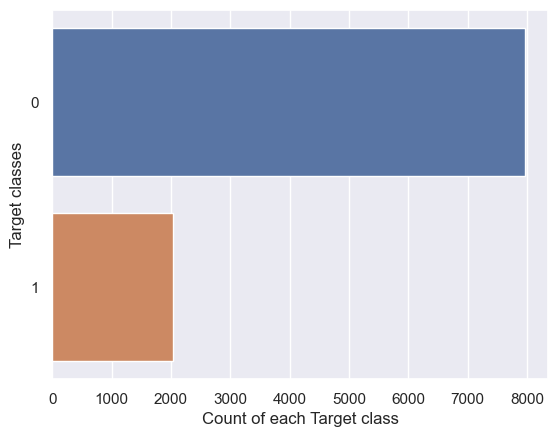

In [23]:
sns.countplot(y=churn_data_encoded.Exited ,data=churn_data_encoded)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

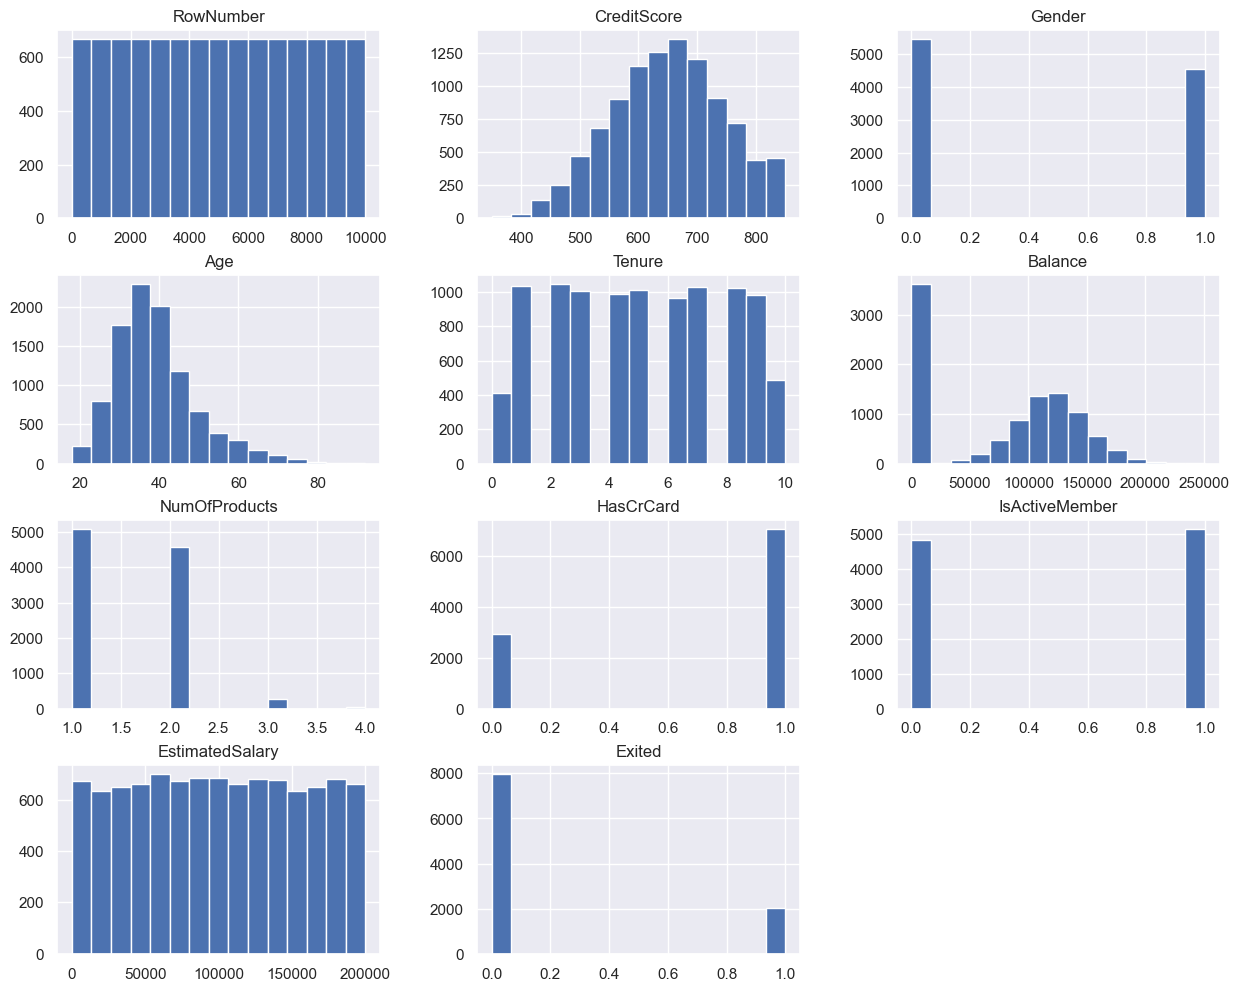

In [28]:
churn_data_encoded.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

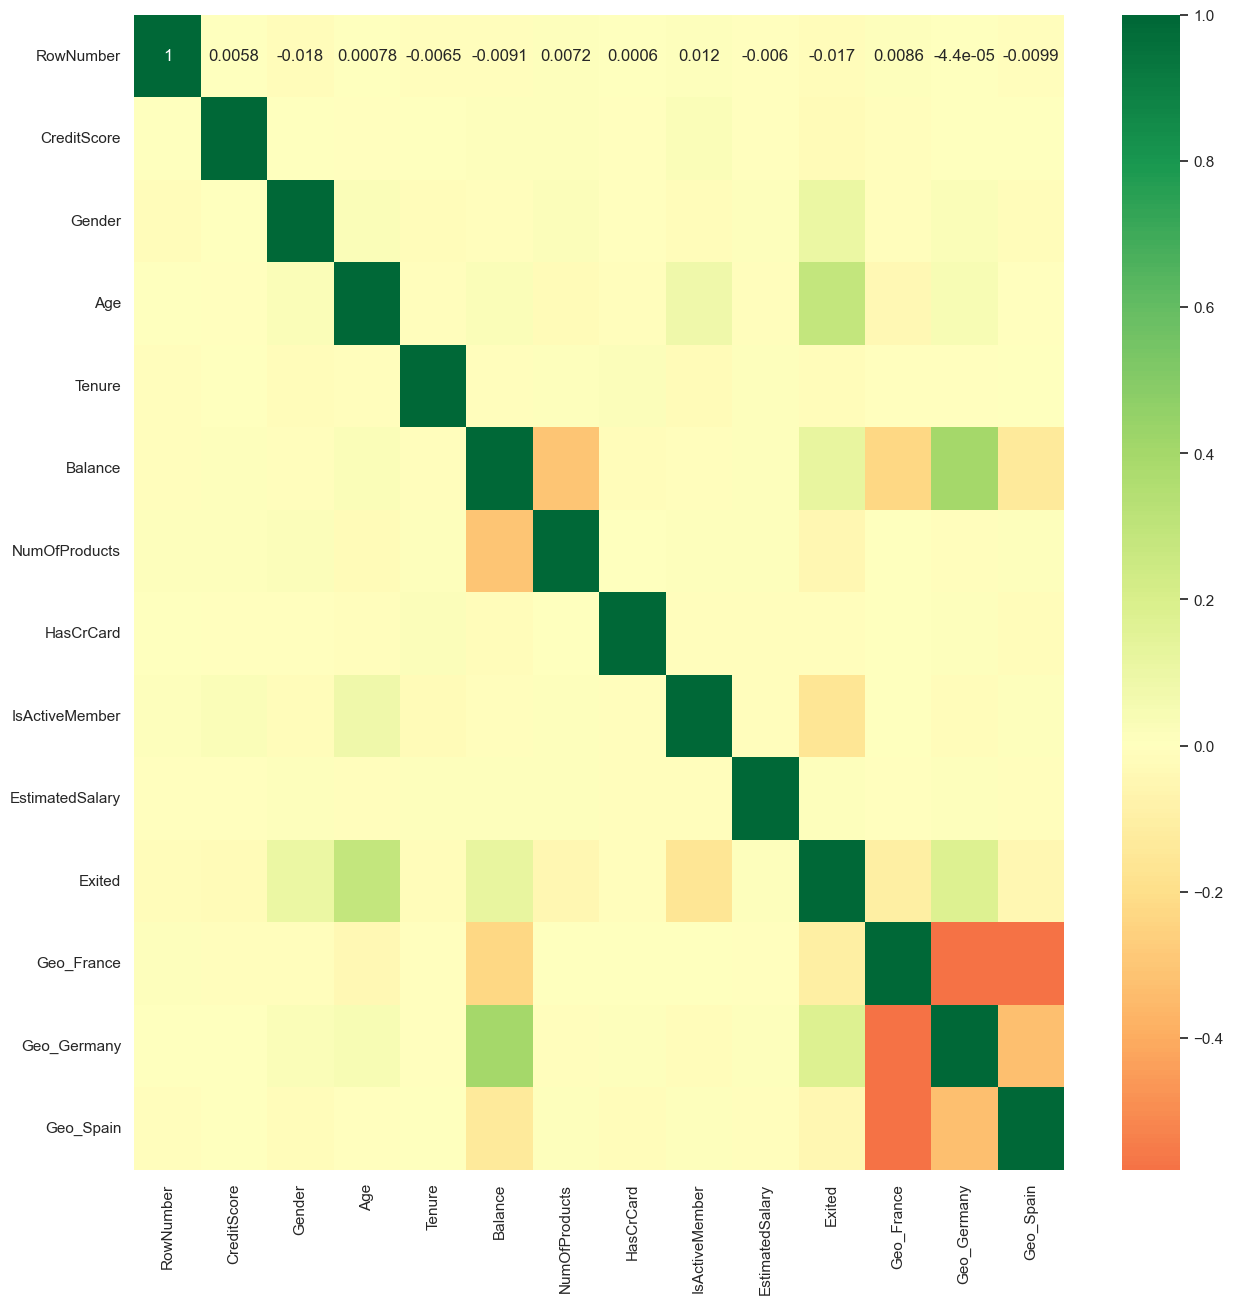

In [32]:
plt.figure(figsize=(15,15))
p=sns.heatmap(churn_data_encoded.corr(), annot=True,cmap='RdYlGn',center=0)

### Individual Features by Class

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

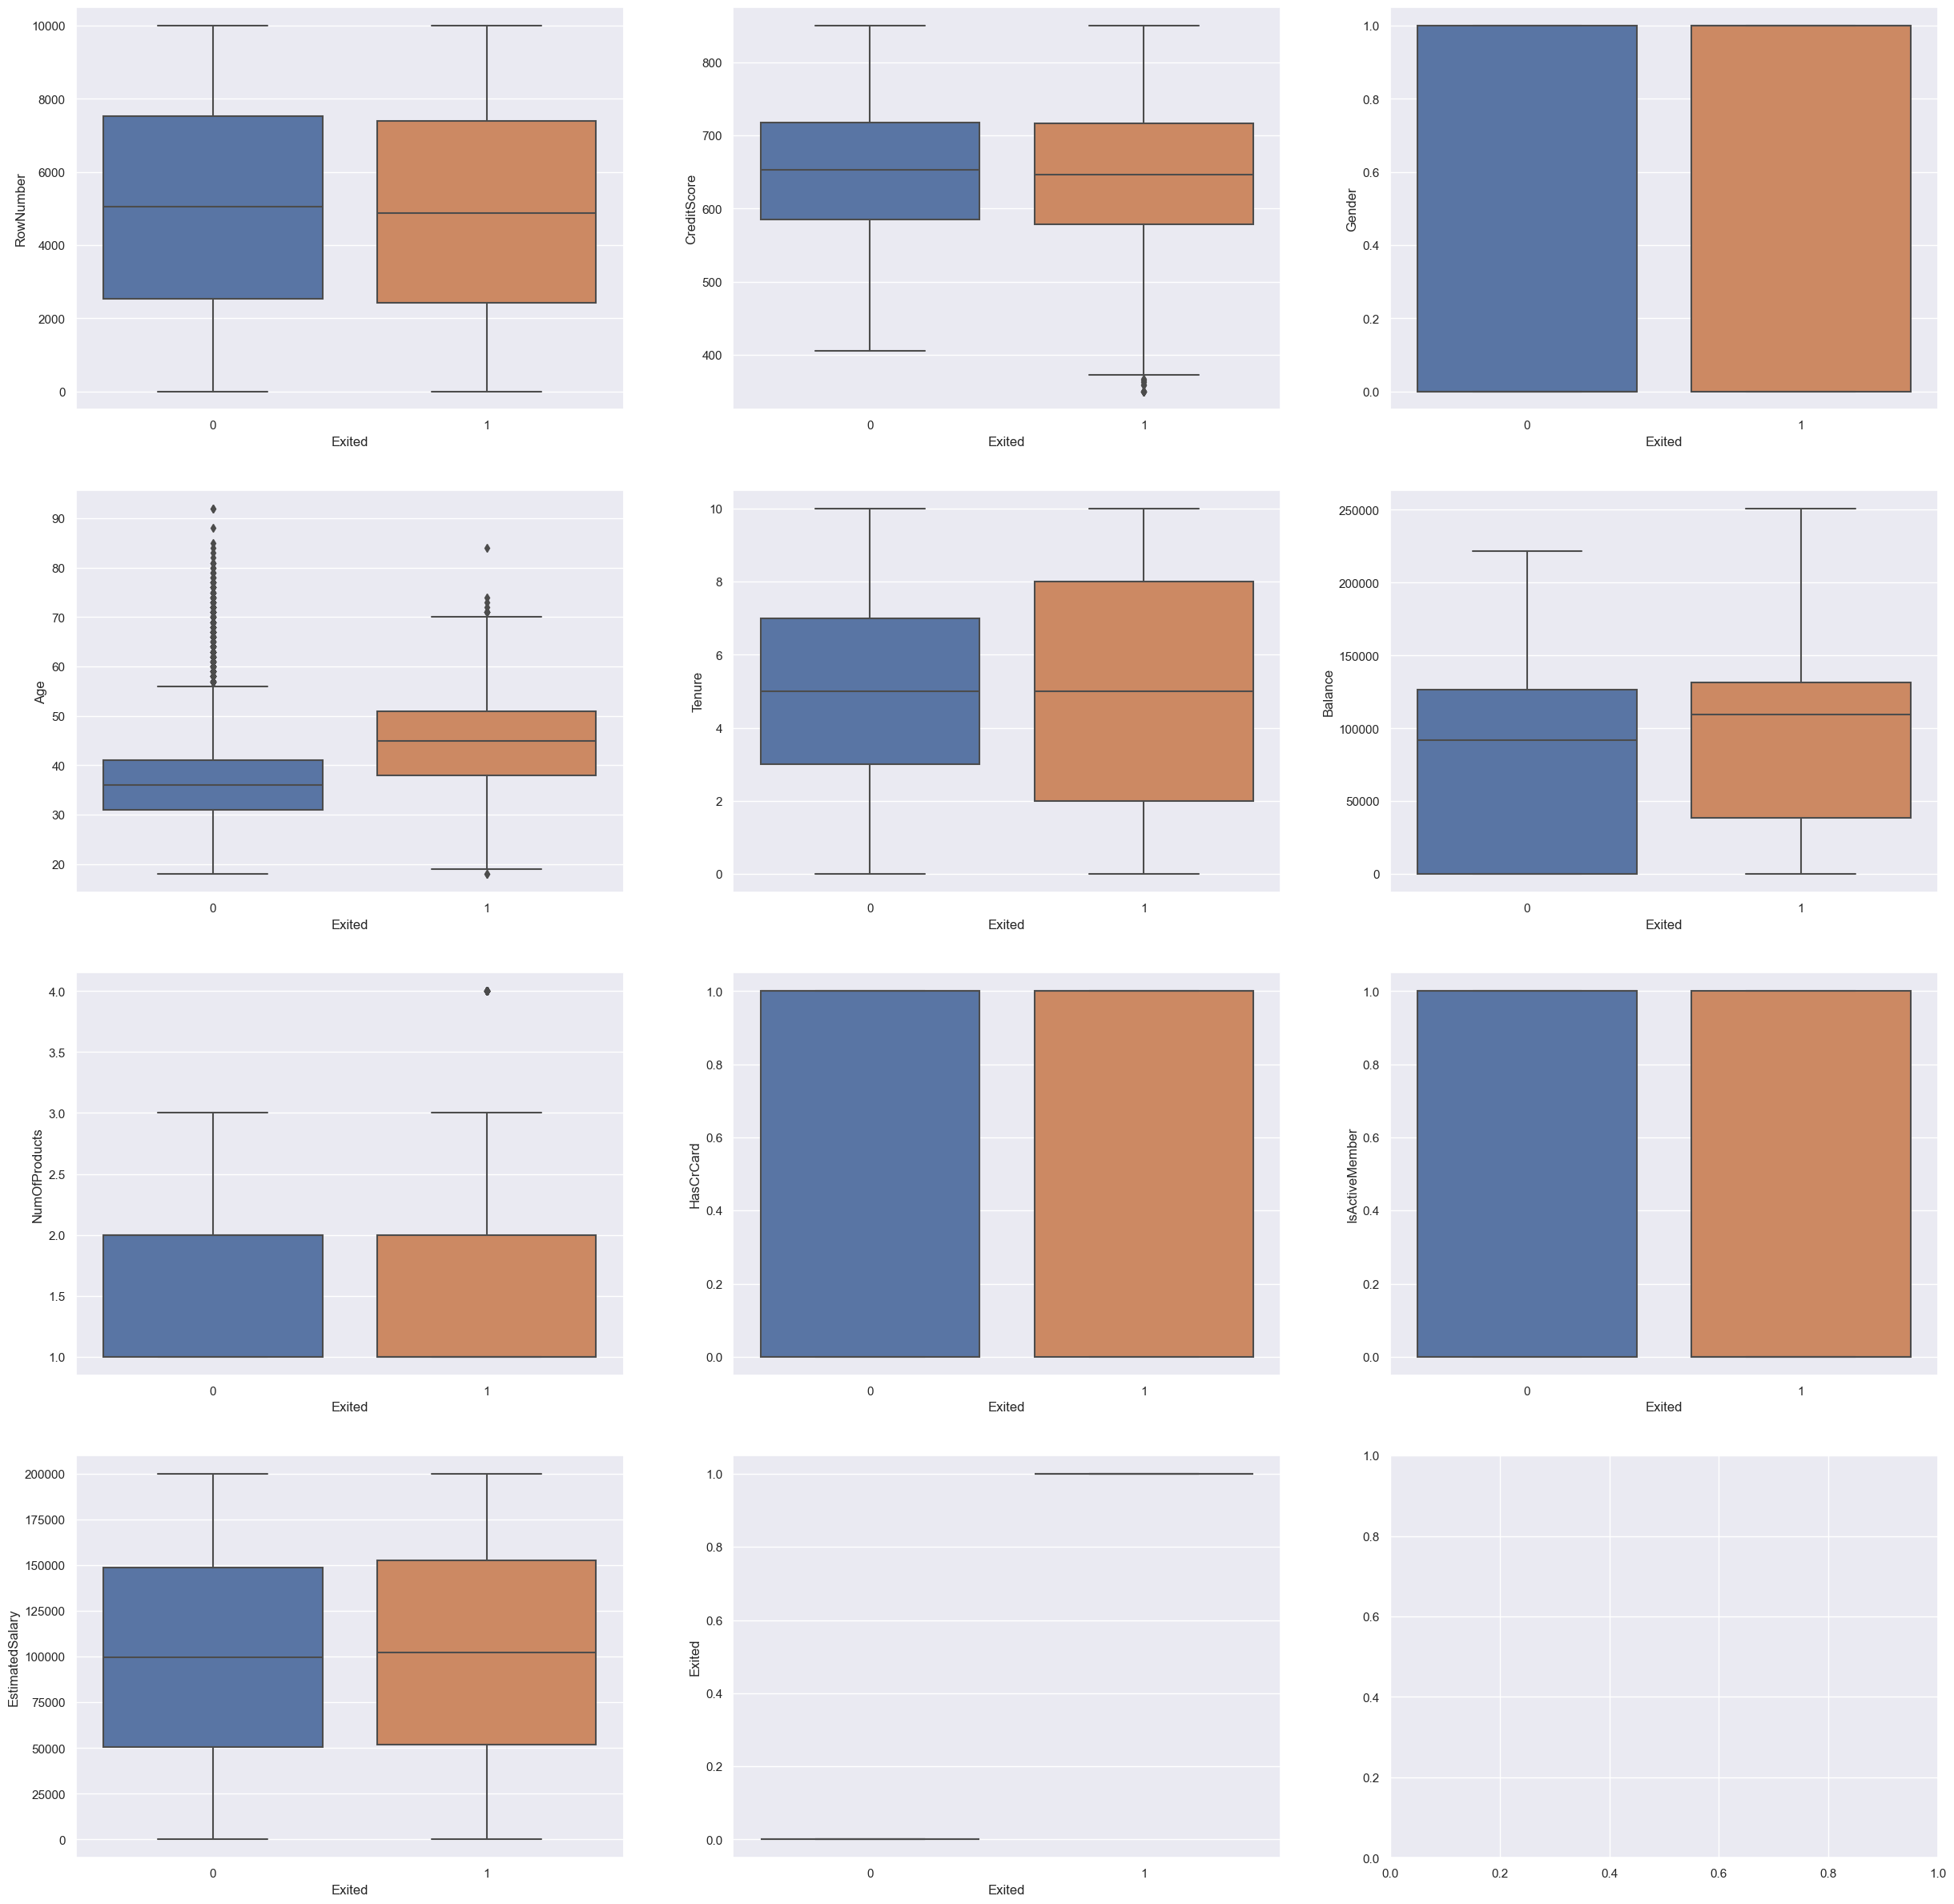

In [34]:
fig,ax = plt.subplots(nrows = 4, ncols=3, figsize=(30,30))
row = 0
col = 0
for i in range(len(churn_data_encoded.columns) -1):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = churn_data_encoded['Exited'], y = churn_data_encoded[churn_data_encoded.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
plt.show()

In [35]:
X = churn_data_encoded.drop(['Exited'],axis=1)
y = churn_data_encoded.Exited

In [36]:
X.head(10)

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain
0,1,619,1,42,2,0.00,1,1,1,101348.88,True,False,False
1,2,608,1,41,1,83807.86,1,0,1,112542.58,False,False,True
2,3,502,1,42,8,159660.80,3,1,0,113931.57,True,False,False
3,4,699,1,39,1,0.00,2,0,0,93826.63,True,False,False
4,5,850,1,43,2,125510.82,1,1,1,79084.10,False,False,True
5,6,645,0,44,8,113755.78,2,1,0,149756.71,False,False,True
6,7,822,0,50,7,0.00,2,1,1,10062.80,True,False,False
7,8,376,1,29,4,115046.74,4,1,0,119346.88,False,True,False
8,9,501,0,44,4,142051.07,2,0,1,74940.50,True,False,False
9,10,684,0,27,2,134603.88,1,1,1,71725.73,True,False,False


### Splitting the dataset into the Training set and Test set

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

### Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler

In [41]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [42]:
X_train

array([[ 0.55525259, -1.78451879, -0.92240378, ...,  0.9860672 ,
        -0.56953701, -0.57436296],
       [-1.28098104,  1.47401668,  1.08412392, ...,  0.9860672 ,
        -0.56953701, -0.57436296],
       [-1.03206475, -0.82854466, -0.92240378, ...,  0.9860672 ,
        -0.56953701, -0.57436296],
       ...,
       [-0.59827879,  0.89837634, -0.92240378, ...,  0.9860672 ,
        -0.56953701, -0.57436296],
       [ 1.68004955, -0.62295883,  1.08412392, ..., -1.01412966,
        -0.56953701,  1.74105933],
       [-0.78245607, -0.2837422 ,  1.08412392, ..., -1.01412966,
         1.75581215, -0.57436296]])

### Sequential model to initialise our ann and dense module to build the layers

In [44]:
from keras.models import Sequential
from keras.layers import Dense

In [49]:
classifier = Sequential()

### Adding the input layer and the first hidden layer

In [59]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

### Adding the second hidden layer

In [62]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

### Adding the output layer

In [72]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

### Compiling the ANN

In [81]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Fitting the ANN to the Training set

In [107]:
classifier = Sequential([
    Dense(10, input_dim=13, activation='relu'),
    Dense(1, activation='sigmoid')
])


C:\Users\Fahan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [108]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [111]:
classifier.fit(X_train, y_train, batch_size=10, epochs=100, verbose=1)

Epoch 1/100
670/670 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8707 - loss: 0.3284
Epoch 2/100
670/670 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8625 - loss: 0.3338
Epoch 3/100
670/670 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8596 - loss: 0.3459
Epoch 4/100
670/670 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8711 - loss: 0.3322
Epoch 5/100
670/670 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8644 - loss: 0.3329
Epoch 6/100
670/670 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8688 - loss: 0.3346
Epoch 7/100
670/670 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8648 - loss: 0.3264
Epoch 8/100
670/670 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8597 - loss: 0.3331
Epoch 9/100
670/670 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8589 - loss: 0.3308
Epoch 10/100
670/670 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8648 - loss: 0.3409
Epoch 11/100
670/670 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8661 - loss: 0.3300
Epoch 12/100
670/670 ━━━━━━━━━━━━━━━━━━━━

In [112]:
score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)

670/670 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8705 - loss: 0.3225


In [113]:
print('Train score:', score)
print('Train accuracy:', acc)

Train score: 0.3238113522529602
Train accuracy: 0.8682089447975159


### Predicting the Test set results

In [114]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [116]:
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)

330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8592 - loss: 0.3266


In [117]:
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.33458802103996277
Test accuracy: 0.8575757741928101


### Making the Confusion Matrix

In [118]:
from sklearn.metrics import confusion_matrix

In [119]:
cm = confusion_matrix(y_test, y_pred)

In [120]:
cm

array([[2487,  130],
       [ 340,  343]], dtype=int64)

### Evaluation Metrics

Text(0.5, 20.049999999999997, 'Predicted label')

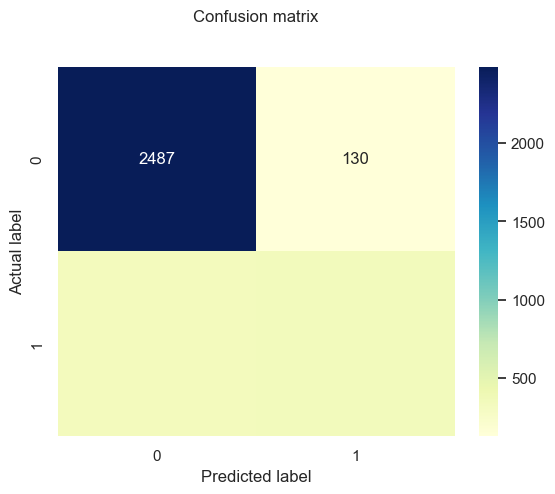

In [124]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [125]:
from sklearn.metrics import classification_report

In [126]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2617
           1       0.73      0.50      0.59       683

    accuracy                           0.86      3300
   macro avg       0.80      0.73      0.75      3300
weighted avg       0.85      0.86      0.85      3300



### ROC Curve

In [127]:
from sklearn.metrics import roc_curve

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


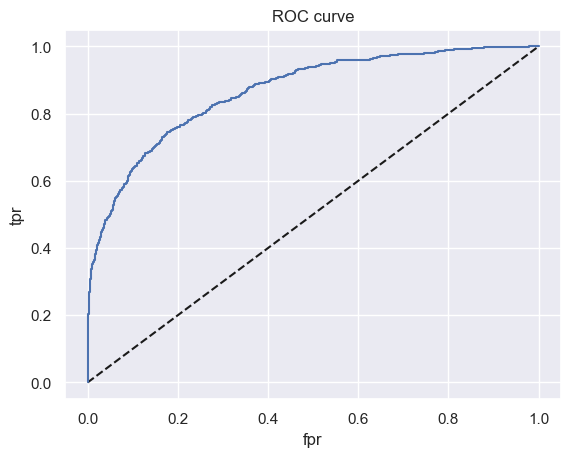

In [133]:
y_pred_proba = classifier.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

### Area under ROC curve

In [134]:
from sklearn.metrics import roc_auc_score

In [135]:
roc_auc_score(y_test,y_pred_proba)

0.8669696001647076